In [1]:
import dimod
from dwave.system import EmbeddingComposite, DWaveSampler

# Number of nodes and qubits per node
num_nodes = 4
qubits_per_node = 3

# Edges of the graph
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]

# BinaryQuadraticModel to represent the problem
bqm = dimod.BinaryQuadraticModel({}, {}, 0.0, dimod.BINARY)

# Adding constraints for each node to have exactly one color
for node in range(1, num_nodes + 1):
    qubits = [f'q_{node}_{color}' for color in range(qubits_per_node)]
    # Penalty for not having exactly one color
    for i in range(qubits_per_node):
        bqm.add_variable(qubits[i], -1)  # Encourage each qubit to be '1'
    for i in range(qubits_per_node):
        for j in range(i + 1, qubits_per_node):
            bqm.add_interaction(qubits[i], qubits[j], 2)  # Penalty for two '1's at the same node

# Adding constraints to prevent adjacent nodes from having the same color
for (node1, node2) in edges:
    for color in range(qubits_per_node):
        bqm.add_interaction(f'q_{node1}_{color}', f'q_{node2}_{color}', 1)

# Set your API token
token = 'DEV-ab5e6d719286e8a1c939306ee164f5f412303f4a'

# Create the sampler with the API token
sampler = EmbeddingComposite(DWaveSampler(token=token))
sampleset = sampler.sample(bqm, num_reads=100)

# Display results
for sample in sampleset:
    print("Sample:", sample)
    coloring = {}
    for node in range(1, num_nodes + 1):
        for color in range(qubits_per_node):
            if sample[f'q_{node}_{color}'] == 1:
                coloring[node] = color
    print("Coloring:", coloring)
    break  # Print only the first sample


Sample: {'q_1_0': 1, 'q_1_1': 0, 'q_1_2': 0, 'q_2_0': 0, 'q_2_1': 1, 'q_2_2': 0, 'q_3_0': 0, 'q_3_1': 1, 'q_3_2': 0, 'q_4_0': 1, 'q_4_1': 0, 'q_4_2': 0}
Coloring: {1: 0, 2: 1, 3: 1, 4: 0}


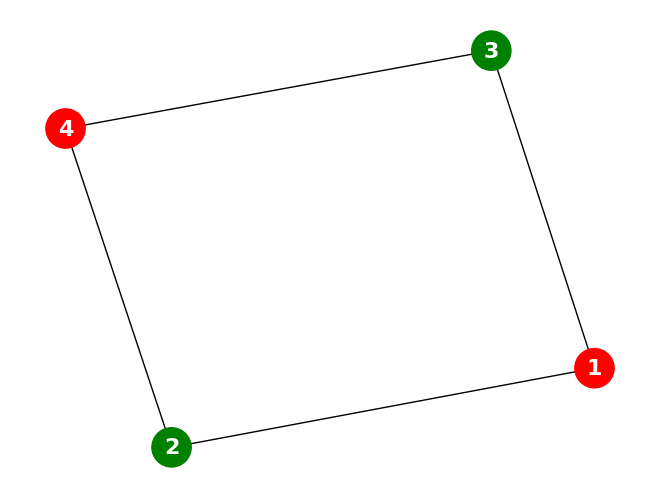

In [2]:
import matplotlib.pyplot as plt 
import networkx as nx

# Visualizing the graph with colored nodes
G = nx.Graph()
G.add_edges_from(edges)

# Assign colors based on the result
color_map = ['red', 'green', 'blue']
node_colors = [color_map[coloring[node]] for node in G.nodes]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_color='white', font_weight='bold', font_size=16)
plt.show()

In [3]:
# Extract the energies from the sampling results
energies = sampleset.record.energy

# Calculate total energy across all samples
total_energy = sum(energies)

# Calculate the average energy
average_energy = total_energy / len(energies)

# Optionally, calculate other statistics
min_energy = min(energies)
max_energy = max(energies)

# Display the results
print(f"Total energy over {len(energies)} runs: {total_energy}")
print(f"Average energy over {len(energies)} runs: {average_energy}")
print(f"Minimum energy: {min_energy}")
print(f"Maximum energy: {max_energy}")


Total energy over 18 runs: -71.0
Average energy over 18 runs: -3.9444444444444446
Minimum energy: -4.0
Maximum energy: -3.0
